In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


In [5]:
df.isnull()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
X=df.drop(columns=['DEATH_EVENT'])
y=df['DEATH_EVENT']

In [8]:
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50


In [13]:
scaler=MinMaxScaler()
X[:]=scaler.fit_transform(X)

In [14]:
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,0.272727,0,0.092498,0,0.469697,0,0.288833,0.089888,0.685714,1,1,0.298932
1,0.454545,0,0.004210,0,0.166667,0,0.339314,0.505618,0.485714,1,0,0.722420
2,0.090909,0,0.071319,1,0.363636,0,0.356286,0.044944,0.771429,0,0,0.854093
3,0.363636,1,0.093264,1,0.393939,1,0.367196,0.078652,0.371429,1,0,0.306050
4,1.000000,1,0.071319,0,0.242424,0,0.528428,0.168539,0.542857,1,0,0.163701


In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
X_train.shape,X_test.shape

((4000, 12), (1000, 12))

In [24]:
def kfold(estimatior,inp,tar):
    return cross_val_score(estimatior,inp,tar)

    

In [27]:
kfold(LogisticRegression(),X_train,y_train)

array([0.845  , 0.845  , 0.88375, 0.855  , 0.83375])

In [29]:
kfold(SVC(),X_train,y_train)

array([0.885  , 0.90125, 0.915  , 0.90375, 0.87125])

In [30]:
kfold(RandomForestClassifier(),X_train,y_train)

array([0.99   , 0.9925 , 0.99375, 0.9925 , 0.99   ])

In [35]:
clf=GridSearchCV(RandomForestClassifier(),{ 'n_estimators':[50,100,150],
                                           'max_depth':[3,5,7],'min_samples_split':[2,3,4]})
clf.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7], 'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 100, 150]})

In [36]:
clf_df=pd.DataFrame(clf.cv_results_)

In [37]:
clf_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_split', 'param_n_estimators',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [38]:
clf_df[['param_max_depth', 'param_min_samples_split', 'param_n_estimators','mean_test_score']].sort_values(by='mean_test_score',ascending=False)

,param_max_depth,param_min_samples_split,param_n_estimators,mean_test_score
24,7,4,50,0.97900
25,7,4,100,0.97875
18,7,2,50,0.97875
20,7,2,150,0.97850
23,7,3,150,0.97850
22,7,3,100,0.97825
19,7,2,100,0.97825
26,7,4,150,0.97800
21,7,3,50,0.97675
10,5,2,100,0.94850


In [40]:
model=RandomForestClassifier(n_jobs=1,n_estimators=150,max_depth=7,min_samples_split=2)
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=7, n_estimators=150, n_jobs=1)

In [41]:
y_test[0:5]
# 0 person survived, 1 person died


1501    0
2586    1
2653    1
1055    1
705     0
Name: DEATH_EVENT, dtype: int64

In [42]:
pred= model.predict(X_test)
pred[:5]

array([0, 1, 0, 1, 0], dtype=int64)

In [43]:
accuracy_score(y_test,pred)

0.977

Text(50.722222222222214, 0.5, 'Actual')

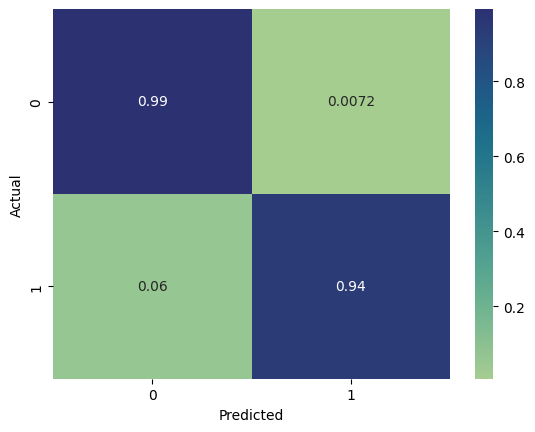

In [47]:
cf=confusion_matrix(y_test,pred,normalize='true')
sns.heatmap(cf,annot=True,cmap='crest')
plt.xlabel('Predicted')
plt.ylabel('Actual')